In [31]:
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
from bilinear_model import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from adjustText import adjust_text
from collections import defaultdict
plt.rcParams['font.size'] = 16

In [2]:
mean_df = pd.read_csv("connection_matrix_mean.csv", index_col = 0)

In [3]:
mean_df = mean_df.rename(index={'xbc': 'bc5xbc'})
mean_df = mean_df.sort_index().sort_index(axis=1)
mean_df

,1wt,27,2an,2aw,2o,37c,37r,37v,3i,4i,...,63,6sn,6sw,72,73,7iv/r/d,82n/wo,82wi,8w,9w
bc1,1.765638,2.078257,2.253563,2.324735,2.321309,-0.468666,-0.352261,-0.451977,1.786638,-0.879778,...,-0.491603,-1.136757,-1.138290,0.398370,0.182421,-1.089168,0.010274,-0.385499,-1.140229,-1.140229
bc2,2.214331,1.960025,2.299652,2.257118,2.137831,0.267909,0.426871,0.304961,2.165173,-0.470123,...,0.187163,-1.133315,-1.137492,0.227581,0.212052,-1.023263,-0.028737,-0.465328,-1.140229,-1.140229
bc3a,0.014845,-0.062604,0.485903,-0.158017,-0.393949,0.636029,0.717180,0.710334,1.160862,2.102363,...,1.387802,-1.055766,-1.100811,-0.607863,-0.046697,-0.926425,-0.709379,-0.921696,-1.140229,-1.140229
bc3b,0.118872,0.046328,0.584665,-0.036917,-0.257395,0.496797,0.589220,0.566447,1.188170,2.007967,...,1.291898,-1.051465,-1.098341,-0.561795,-0.025702,-0.937863,-0.670452,-0.894768,-1.140229,-1.140229
bc4,0.471432,0.402518,0.944175,0.355128,0.094079,0.722966,0.836894,0.792993,1.542472,1.828827,...,1.413330,-1.039303,-1.086604,-0.405010,0.114936,-0.923305,-0.547103,-0.821611,-1.140229,-1.140229
bc5i,-0.851685,-0.546839,-0.786281,-0.813143,-0.819216,0.181085,0.035943,0.098772,-0.710858,-0.713936,...,1.268667,2.580273,2.447052,-0.382388,0.470584,0.932348,-0.707757,-0.867421,-1.073277,-1.121080
bc5o,-0.855314,-0.620546,-0.749512,-0.814676,-0.796450,-0.250678,-0.351711,-0.307808,-0.694386,-0.528597,...,1.280664,2.419237,2.315047,-0.571565,0.244686,0.137725,-0.703260,-0.919451,-1.101646,-1.132977
bc5t,-0.856793,-0.574459,-0.723707,-0.815525,-0.791575,0.216665,0.091783,0.152937,-0.676352,-0.404399,...,1.242985,1.898121,1.609563,-0.392948,0.529689,0.874217,-0.650643,-0.878301,-1.087786,-1.128714
bc5xbc,-0.965785,-0.778030,-0.915734,-0.933525,-0.927825,-0.603829,-0.690718,-0.657270,-0.862624,-0.813653,...,0.945038,2.483194,2.608063,-0.771328,-0.140417,-0.316393,-0.845175,-0.988764,-1.113474,-1.137804
bc6,-0.573996,0.106176,-0.521340,-0.545817,-0.597708,-0.468275,-0.486316,-0.457389,-0.457782,-0.569300,...,-0.036143,0.094611,0.195177,0.638912,0.835000,-0.116227,1.768752,2.018341,1.953503,1.739948


<AxesSubplot:>

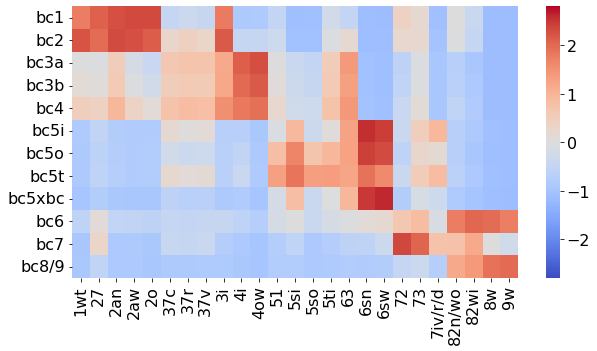

In [4]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(mean_df, cmap='coolwarm', vmin=-2.8, vmax=2.8)

In [5]:
bc_pca_components = np.load('bc_pca_components.npy')
A_est = np.load('A_est.npy')
rgc_pca_components = np.load('rgc_pca_components.npy')
B_est = np.load('B_est.npy')

In [6]:
with open('rgc_df_gene_selected.pkl', 'rb') as f:
    rgc_df = pickle.load(f)
rgc_df_all = rgc_df.copy()
rgc_df_all

_index,GM37381,RP1,MRPL15,RGS20,NPBWR1,4732440D04RIK,GM26901,MYBL1,VCPIP1,SNHG6,...,GM28510,GM20831,GM20792,GM21209,GM29082,GM29564,GM21760,GM21409,GM20820,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
25,0.0,0.0,0.000000,0.849207,0.0,0.0,0.0,0.0,0.849207,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.301712
3,0.0,0.0,0.000000,1.146473,0.0,0.0,0.0,0.0,0.729256,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
28,0.0,0.0,0.658763,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
28,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.571013,0.571013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
14,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.589141,0.957386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,0.333000,0.333000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
15,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.420690,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420690


In [7]:
df = pd.read_csv("RGC_type_correspondence_combined.csv")
df

,Goetz et al. (2022) Type,Bae et al. (2018) Eyewire type,Tran et al. (2019) Cluster
0,ON sus alpha,8w,C43
1,OFFhOS,2aw,C9
2,OFFvOS,2aw,C5
3,ON tr SmRF,6sn,C30
4,OFF tr alpha,4ow,C45
5,OFF tr SmRF,4i,C21
6,ONhOS SmRF,82wi,C27
7,ONhOS LgRF,82n/wo,C36
8,ONvOS SmRF,72,C38
9,"ON DS sus DN, T, V",7iv/r/d,C10


In [8]:
# Initialize an empty dictionary
rgc_map = {}

# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract the value and key from the row
    value = row['Bae et al. (2018) Eyewire type']
    key = row['Tran et al. (2019) Cluster']
    
    # Extract the number from the 'key' column
    key_number = int(key[1:])
    
    # Adjust the key number by subtracting 1
    adjusted_key = key_number - 1
    
    # Add the key-value pair to the dictionary
    rgc_map[adjusted_key] = value

# Print the resulting dictionary
print(rgc_map)

{42: '8w', 8: '2aw', 4: '2aw', 29: '6sn', 44: '4ow', 20: '4i', 26: '82wi', 35: '82n/wo', 37: '72', 9: '7iv/r/d', 15: '37v', 23: '37r', 12: '5si', 5: '5so', 1: '5ti', 10: '51', 2: '63', 13: '73', 17: '3i', 24: '2o', 25: '27', 30: '9w', 41: '1wt', 11: '37c', 3: '2an', 40: '6sw'}


In [9]:
# Annotate data
rgc_df = rgc_df[rgc_df.index.isin(rgc_map.keys())]
rgc_df = rgc_df.rename(index = rgc_map)
rgc_df

_index,GM37381,RP1,MRPL15,RGS20,NPBWR1,4732440D04RIK,GM26901,MYBL1,VCPIP1,SNHG6,...,GM28510,GM20831,GM20792,GM21209,GM29082,GM29564,GM21760,GM21409,GM20820,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
27,0.0,0.0,0.000,0.849207,0.0,0.0,0.0,0.0,0.849207,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.301712
2an,0.0,0.0,0.000,1.146473,0.0,0.0,0.0,0.0,0.729256,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
37c,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.822634,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.822634
37r,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.986616,0.514533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3i,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.945292,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7iv/r/d,0.0,0.0,0.333,0.333000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
63,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
37v,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.420690,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420690


In [34]:
# Create a copy of rgc_df_all to preserve the original DataFrame
rgc_df_updated = rgc_df_all.copy()

# Separate the DataFrame into two sub-DataFrames based on index presence in rgc_map
in_dict_indices = [index for index in rgc_df_all.index if index in rgc_map]
not_in_dict_indices = [index for index in rgc_df_all.index if index not in rgc_map]

# Rename the first sub-DataFrame with its value from the dictionary
rgc_df_updated.rename(index={index: rgc_map[index] for index in in_dict_indices}, inplace=True)

# Rename the second sub-DataFrame with 'Cx' where x = index + 1
rgc_df_updated.rename(index={index: f'C{index + 1}' for index in not_in_dict_indices}, inplace=True)

# Print the updated DataFrame
rgc_df_updated

_index,GM37381,RP1,MRPL15,RGS20,NPBWR1,4732440D04RIK,GM26901,MYBL1,VCPIP1,SNHG6,...,GM28510,GM20831,GM20792,GM21209,GM29082,GM29564,GM21760,GM21409,GM20820,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
27,0.0,0.0,0.000000,0.849207,0.0,0.0,0.0,0.0,0.849207,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.301712
2an,0.0,0.0,0.000000,1.146473,0.0,0.0,0.0,0.0,0.729256,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
C29,0.0,0.0,0.658763,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
C29,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.571013,0.571013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
C15,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.589141,0.957386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7iv/r/d,0.0,0.0,0.333000,0.333000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
63,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
37v,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.420690,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420690


In [35]:
# Standardization
scaler = StandardScaler()
rgc_df_values = scaler.fit_transform(rgc_df_updated.values)
rgc_df_values

array([[-0.00711395, -0.04057876, -0.26898231, ..., -0.00529286,
        -0.00529286,  2.90838518],
       [-0.00711395, -0.04057876, -0.26898231, ..., -0.00529286,
        -0.00529286, -0.53480901],
       [-0.00711395, -0.04057876,  3.45883168, ..., -0.00529286,
        -0.00529286, -0.53480901],
       ...,
       [-0.00711395, -0.04057876, -0.26898231, ..., -0.00529286,
        -0.00529286,  0.57797018],
       [-0.00711395, -0.04057876, -0.26898231, ..., -0.00529286,
        -0.00529286, -0.53480901],
       [-0.00711395, -0.04057876, -0.26898231, ..., -0.00529286,
        -0.00529286,  1.35996674]])

In [36]:
rgc_df_pca = rgc_df_values.dot(rgc_pca_components)
rgc_df_pca

array([[ 1.49993186e+01, -2.58812460e+00,  9.56066881e+00, ...,
        -9.67896131e-01,  7.39574217e-01,  5.25953379e-01],
       [-5.06889717e-01, -1.04010026e+01,  1.56033126e+00, ...,
        -3.63587130e-01,  5.12136483e-02, -5.92102525e-01],
       [ 9.85297425e+00, -2.72096398e+00,  5.96314210e+00, ...,
         1.60373070e-01,  4.39030865e-01, -4.42634763e-01],
       ...,
       [ 1.25679243e+01,  1.34983122e+01, -4.56489754e+00, ...,
        -1.88548227e-01,  3.17114398e-01, -1.02637852e+00],
       [ 5.14750921e+00,  1.29844368e+01, -3.00691751e+00, ...,
        -2.20444297e-01,  9.05546813e-01,  1.04853441e+00],
       [-1.35369715e+01,  7.76626902e+00,  7.72152765e-02, ...,
         2.28819987e-03, -3.50695235e-01,  6.65132032e-02]])

In [37]:
rgc_df_pca = pd.DataFrame(rgc_df_pca, index=rgc_df_updated.index)
rgc_df_pca

,0,1,2,3,4,5,6,7,8,9,...,11313,11314,11315,11316,11317,11318,11319,11320,11321,11322
annotated,,,,,,,,,,,,,,,,,,,,,
27,14.999319,-2.588125,9.560669,6.573113,2.491502,-4.972648,-11.249154,-0.973840,-5.562451,0.038424,...,0.905853,0.422790,-0.300945,0.824857,-0.898279,0.345880,-0.326152,-0.967896,0.739574,0.525953
2an,-0.506890,-10.401003,1.560331,15.206981,-2.274049,-5.460095,3.883850,3.265517,-6.155110,-0.678253,...,1.306282,0.234638,0.119502,-0.819465,-0.468894,1.259219,0.268433,-0.363587,0.051214,-0.592103
C29,9.852974,-2.720964,5.963142,3.521902,3.022429,-3.199601,-3.397872,-3.858882,-1.674408,-2.154708,...,0.704003,0.461960,0.778133,1.219730,1.079130,-1.670154,0.618646,0.160373,0.439031,-0.442635
C29,7.153477,-4.499815,8.701807,3.005535,1.840009,-2.683337,-3.624237,-1.596937,-1.093550,-2.242050,...,-2.061025,0.100406,-0.960546,1.106406,-1.252124,-0.741241,-0.513940,-0.739157,-0.705802,-0.406706
C15,4.205206,-4.908322,3.147053,2.056425,0.818168,-2.721178,-1.749545,-3.508524,-2.000079,-0.043330,...,0.329194,0.128406,-0.884486,0.266928,0.815270,-0.505491,-0.423940,-0.503816,1.719469,-0.620345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7iv/r/d,-0.432001,16.222401,-9.628029,-4.673475,-13.144413,2.177823,2.317133,1.345234,3.465246,-5.786581,...,-0.978681,-1.524386,1.163947,0.268717,0.074049,-0.678568,0.819934,0.854922,-0.109721,0.352228
63,-17.888356,2.996567,-3.792716,-5.614737,-3.277656,2.238121,0.709154,2.240746,-5.253286,1.619070,...,-0.207481,-0.257646,-0.574869,0.432966,1.882719,0.878928,0.278768,0.080789,0.443105,0.350624
37v,12.567924,13.498312,-4.564898,5.500018,-4.826389,-7.367411,-0.727732,-7.548672,0.413700,4.558279,...,-0.013190,-1.099998,0.387959,0.582640,-0.153525,-0.092482,-0.825882,-0.188548,0.317114,-1.026379


In [38]:
rgc_mean_df = rgc_df_pca.groupby(rgc_df_pca.index).mean()
rgc_mean_df = rgc_mean_df.sort_index().sort_index(axis=1)
#rgc_var_df = np.diag(rgc_var)
rgc_var = rgc_df_pca.groupby(rgc_df_pca.index).var().sum()
rgc_mean_df = rgc_mean_df/np.sqrt(rgc_var)
rgc_mean_df

,0,1,2,3,4,5,6,7,8,9,...,11313,11314,11315,11316,11317,11318,11319,11320,11321,11322
annotated,,,,,,,,,,,,,,,,,,,,,
1wt,0.553648,0.160659,0.010193,0.268699,0.089868,0.108952,-0.044418,-0.327324,-0.703270,0.057788,...,0.013210,0.010060,-0.003745,-0.006029,-0.008386,-0.003737,0.012909,0.003526,0.002015,0.020125
27,0.201730,0.059742,0.623284,0.131921,0.069931,-0.244945,-0.119679,-0.291491,-0.376223,-0.260811,...,0.000780,-0.001155,-0.007934,-0.000938,-0.003633,-0.001853,0.010278,-0.003883,-0.001584,-0.001045
2an,-0.201485,-0.056378,0.056382,0.583994,-0.219471,-0.337275,0.238679,0.236210,-0.412124,-0.046344,...,0.001457,-0.002274,-0.003906,0.003456,-0.002738,0.000087,0.000554,-0.000089,-0.001300,-0.001643
2aw,-0.033886,-0.001975,0.875980,0.031126,-0.335538,0.198663,-0.195810,0.025796,0.217381,-0.041717,...,-0.001303,-0.002724,-0.002923,0.000646,-0.006018,-0.000074,0.002644,-0.001411,-0.003807,-0.000038
2o,0.198154,0.051667,0.448655,-0.136140,0.422051,-0.740358,0.038323,-0.305051,-0.535477,-0.260148,...,0.001861,0.005520,-0.009193,-0.010365,0.005923,-0.001327,0.006434,0.007305,0.001918,-0.001161
37c,0.119673,0.054115,0.234809,-0.400166,0.281055,-0.944590,0.115981,-0.031850,-0.027265,0.255432,...,0.001917,0.001042,-0.002816,-0.000907,-0.000475,-0.004502,-0.002223,-0.001264,0.002289,0.003998
37r,0.201371,0.053422,-0.414009,0.069322,-0.969931,-0.048581,0.020608,-0.214147,0.071341,0.232918,...,-0.003563,-0.000985,-0.000376,0.002740,-0.004282,-0.002007,0.003560,0.002611,0.001712,0.002442
37v,0.163044,0.058669,-0.237412,-0.056960,-0.669283,-0.430337,0.112075,-0.167781,0.112956,0.384272,...,0.000603,-0.003249,-0.003684,0.001312,-0.001416,-0.001336,0.002122,0.000042,0.000080,-0.003538
3i,0.230386,0.097569,-0.115702,-0.236124,0.235575,0.115106,0.011974,0.263026,-0.174527,-0.407000,...,-0.003498,-0.002063,0.004303,0.009464,-0.002290,0.002368,-0.003236,-0.001997,-0.000277,0.002308


In [39]:
with open('bc_df_gene_selected.pkl', 'rb') as f:
    bc_df = pickle.load(f)
bc_df_all = bc_df.copy()
bc_df_all

_index,XKR4,RP1,SOX17,RGS20,4732440D04RIK,GM26901,SNTG1,MYBL1,PPP1R42,CPA6,...,MID1,GM21887,ASMT,ZFY1,USP9Y,GM21704,KDM5D,GM29650,GM28919,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
6,1.708522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
5,2.684568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
14,1.176548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.176548,0.0,0.0,0.000000
14,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.850446
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.087015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.087015,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
8,2.510073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
14,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.092912,0.0,0.0,1.092912


In [40]:
bc_map = {
    0:"bc1",
    1:"bc1",
    2:"bc2",
    3:"bc3a",
    4:"bc3b",
    5:"bc4",
    6:"bc5i",
    7:"bc5o",
    8:"bc5t",
    #9:"xbc",
    9:"bc5xbc",
    10:"bc6",
    11:"bc7",
    12:"bc8/9",
    13:"bc8/9",
}

In [41]:
# Annotate data
bc_df = bc_df[bc_df.index.isin(bc_map.keys())]
bc_df = bc_df.rename(index = bc_map)
bc_df

_index,XKR4,RP1,SOX17,RGS20,4732440D04RIK,GM26901,SNTG1,MYBL1,PPP1R42,CPA6,...,MID1,GM21887,ASMT,ZFY1,USP9Y,GM21704,KDM5D,GM29650,GM28919,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
bc5i,1.708522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
bc4,2.684568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
bc1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
bc3b,1.191177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.191177,0.0,0.0,2.318833
bc1,2.059829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bc5o,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.290093
bc3b,1.087015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.087015,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
bc5t,2.510073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [42]:
# Standardization
scaler = StandardScaler()
bc_df_values = scaler.fit_transform(bc_df.values)
bc_df_values

array([[ 1.04902692, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       [ 2.03041594, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       [-0.66884696, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       ...,
       [ 1.85496487, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       [-0.66884696, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       [-0.66884696, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ]])

In [43]:
bc_df_pca = bc_df_values.dot(bc_pca_components)
bc_df_pca

array([[ -0.12872798,  -1.20361821, -10.32377701, ...,  -0.59018278,
          0.52464136,  -1.40674432],
       [ 11.91891464,  14.11772295,  -5.94464872, ...,  -0.04247003,
         -0.39425072,   0.57186931],
       [ -4.91783888,   2.08794846,   0.50058863, ...,  -0.20868416,
          0.82133616,   0.32560978],
       ...,
       [  1.9083848 ,  -8.44639099,  -3.53090345, ...,   0.29613201,
          1.39541613,  -0.20936096],
       [  6.93028857,   7.60559445,  -1.74790716, ...,   0.84520541,
          0.77357591,   0.4295101 ],
       [ -2.2360223 ,   9.15283555,  -1.32943607, ...,   1.05933862,
         -0.13766681,   1.16529867]])

In [44]:
bc_df_pca = pd.DataFrame(bc_df_pca, index=bc_df.index)
bc_df_pca

,0,1,2,3,4,5,6,7,8,9,...,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141
annotated,,,,,,,,,,,,,,,,,,,,,
bc5i,-0.128728,-1.203618,-10.323777,10.064799,7.063951,13.202893,-2.626763,4.927467,-4.207110,-3.132436,...,-1.950023,-0.670203,-0.627677,1.340029,-0.440501,0.662822,0.824414,-0.590183,0.524641,-1.406744
bc4,11.918915,14.117723,-5.944649,5.408337,0.450125,-1.149596,-3.119811,-4.743687,9.338776,-2.521694,...,0.785206,-1.347097,0.342434,-0.634371,0.867934,1.255451,0.523837,-0.042470,-0.394251,0.571869
bc1,-4.917839,2.087948,0.500589,-2.776764,-0.125900,3.594678,-3.589662,4.038731,0.508007,8.261830,...,-0.169337,-0.116798,0.966665,-0.284019,-0.611072,-0.481046,-0.101466,-0.208684,0.821336,0.325610
bc3b,11.251560,6.433536,-0.639676,2.401005,-0.816314,-5.390041,0.791822,-0.645465,-4.001233,4.796354,...,-0.859833,0.752669,-1.781332,0.312624,0.340582,1.310148,-0.131089,0.133742,-1.140760,-4.306161
bc1,-1.336812,4.375100,-2.769934,-1.598164,0.877740,6.964925,-1.068774,4.142014,7.588169,7.941197,...,-0.214172,0.822804,-0.206337,0.181227,-0.297897,-0.395800,-0.271992,-0.329292,-0.210984,1.760626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bc5o,7.120252,-7.245536,12.510058,6.402485,-3.939888,2.727809,-3.040933,-1.494200,-0.133632,3.690782,...,-1.956752,-2.088609,1.855310,0.335309,-0.075161,-1.531954,0.708068,1.680349,-1.863662,-0.002842
bc3b,12.277012,9.449570,-2.884269,3.119834,-2.300251,-4.146569,0.924586,-2.534810,-5.254393,-1.157426,...,0.884541,-3.220803,0.258245,0.894285,1.926090,-0.872641,0.484553,-2.013693,0.689398,0.529821
bc5t,1.908385,-8.446391,-3.530903,-10.152383,-1.668575,0.581805,0.401636,2.417797,1.476589,-5.644410,...,0.278056,1.246981,-0.694047,-0.517813,-0.155060,-1.113244,0.582025,0.296132,1.395416,-0.209361


In [45]:
bc_mean_df = bc_df_pca.groupby(bc_df_pca.index).mean()
bc_mean_df = bc_mean_df.sort_index().sort_index(axis=1)
bc_var = bc_df_pca.groupby(bc_df_pca.index).var().sum()
bc_mean_df = bc_mean_df/np.sqrt(bc_var)
bc_mean_df

,0,1,2,3,4,5,6,7,8,9,...,3132,3133,3134,3135,3136,3137,3138,3139,3140,3141
annotated,,,,,,,,,,,,,,,,,,,,,
bc1,-0.124906,0.651657,-0.056886,-0.216782,0.045616,0.479158,-0.149424,0.049344,0.495078,0.489007,...,-0.008796,0.000440,0.007551,0.008130,0.004492,0.004298,0.016566,-0.011721,-0.011109,0.005865
bc2,-0.989565,0.777719,0.605643,-0.681671,0.449138,0.092114,-0.816348,-0.311813,-0.484495,-0.178149,...,0.007072,-0.003857,-0.004411,-0.001817,-0.002593,-0.004343,0.000431,0.016340,0.002584,0.004137
bc3a,-0.312601,0.550331,0.861689,-0.011634,0.587257,-0.017278,1.106711,0.103689,0.112572,-0.092369,...,0.002701,0.008346,0.005519,-0.010258,0.008298,-0.001294,0.005828,-0.022214,0.001030,0.000828
bc3b,1.020344,0.794336,-0.185964,0.002216,-0.263068,-0.357799,0.064340,0.071248,-0.539451,0.082165,...,-0.001006,0.001428,-0.001938,-0.002314,0.002996,-0.003004,-0.010524,0.012333,0.000123,-0.010550
bc4,0.918902,1.280392,-0.519064,0.046281,-0.185773,0.078908,-0.144013,-0.225504,0.885732,-0.304827,...,-0.000219,-0.007172,0.000995,0.009499,-0.003165,0.014747,-0.000894,0.007738,0.012197,0.005970
bc5i,0.545519,-1.074042,-0.375155,-0.419846,0.360277,-0.333709,-0.106512,0.093378,0.195083,-0.087044,...,-0.000446,-0.002343,-0.002446,0.007161,-0.002986,-0.009783,-0.002002,0.002688,0.003323,0.002638
bc5o,0.559864,-0.779252,1.362928,0.438057,-0.296719,0.316644,-0.251170,-0.139952,-0.028082,0.087289,...,-0.000734,-0.011060,-0.001595,-0.007631,0.003034,0.003682,-0.012204,-0.008704,-0.000075,0.000178
bc5t,0.187583,-0.463991,0.684399,-0.002862,-0.504875,0.545256,-0.117915,-0.032983,0.263351,-0.333134,...,0.015130,-0.003417,-0.000608,-0.006999,-0.009451,-0.003644,0.029710,0.000160,0.014374,-0.005725
bc5xbc,0.493104,-0.686548,0.159462,-0.332810,0.173096,-0.132139,-0.030842,0.425515,-0.052987,0.171214,...,-0.003294,0.020352,-0.003623,0.024810,-0.018459,0.017573,0.003789,-0.004721,-0.001314,0.000298


Text(154.0, 0.5, '')

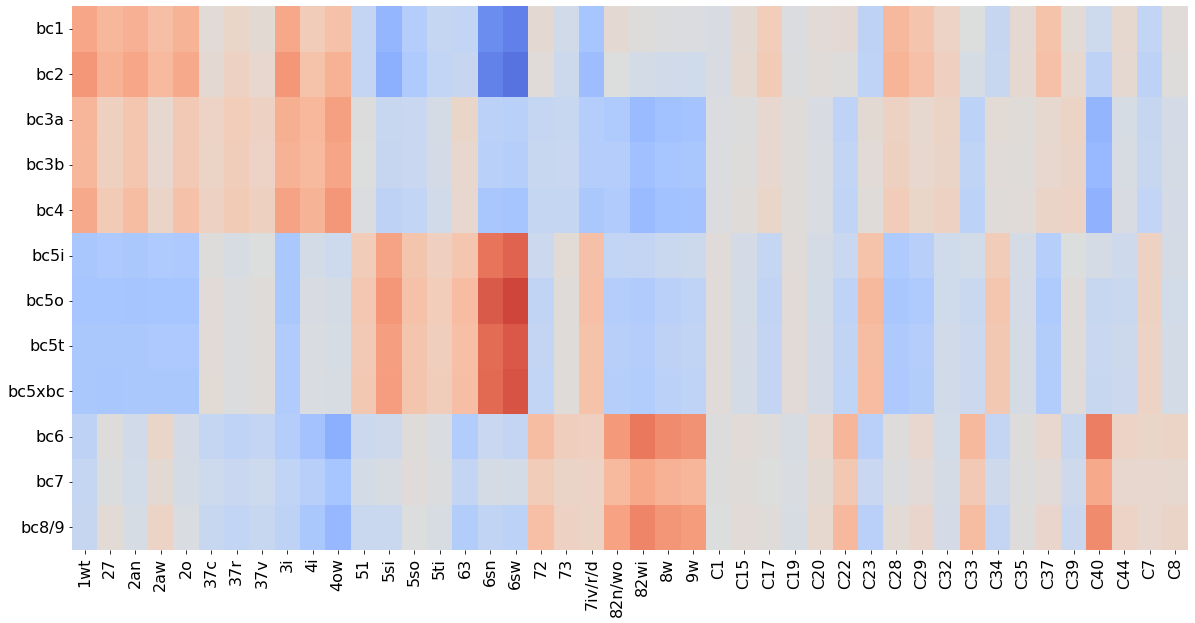

In [46]:
test = bc_mean_df.dot(A_est).dot(rgc_mean_df.dot(B_est).T)
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
heatmap = sns.heatmap(test, cmap='coolwarm', cbar = False, vmin=-2.1, vmax=2.1)
axs.set_xlabel('')
axs.set_ylabel('')

[Text(0.5, 0, '1'), Text(1.5, 0, '2')]

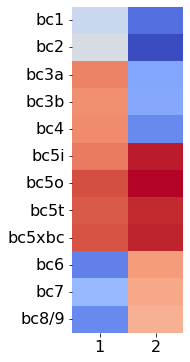

In [47]:
fig, axs = plt.subplots(1, 1, figsize=(2, 6))
sns.heatmap(bc_mean_df.dot(A_est), cmap='coolwarm', cbar = False)
axs.set_ylabel('')
axs.set_xticklabels([1, 2])

[Text(0, 0.5, '1'), Text(0, 1.5, '2')]

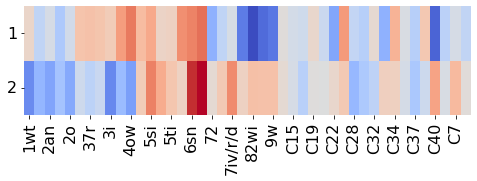

In [48]:
fig, axs = plt.subplots(1, 1, figsize=(8, 2))
sns.heatmap(rgc_mean_df.dot(B_est).T, cmap='coolwarm', cbar = False)
axs.set_xlabel('')
axs.set_yticklabels([1, 2], rotation=0)

In [53]:
bc_2d = bc_mean_df.dot(A_est)
bc_2d

,0,1
annotated,,
bc1,-0.398937,-1.391912
bc2,-0.267892,-1.617517
bc3a,0.650839,-0.989162
bc3b,0.574243,-0.975138
bc4,0.603404,-1.197327
bc5i,0.696848,1.150359
bc5o,0.957738,1.213291
bc5t,0.884687,1.108985
bc5xbc,0.917045,1.125418


/var/folders/yq/mt1zw2_j3d5g1lpzzv8vb0w40000gn/T/ipykernel_9710/3767344089.py:13: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  label = plt.annotate(bc_type, (x[i], y[i]), textcoords="offset points", ha='center')


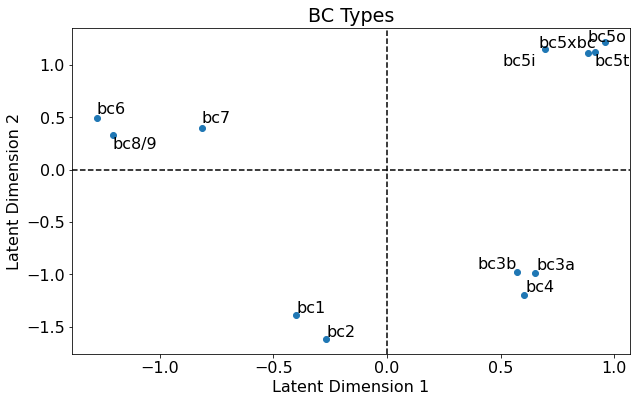

In [59]:
# Get the x and y coordinates from the dataframe
x = bc_2d[0]
y = bc_2d[1]

# Plot the points
plt.figure(figsize=(10, 6))
plt.scatter(x, y)

# Set labels for RGC types
bc_types = bc_2d.index.astype(str).tolist()
labels = []
for i, bc_type in enumerate(bc_types):
    label = plt.annotate(bc_type, (x[i], y[i]), textcoords="offset points", ha='center')
    labels.append(label)
    bc_value_dim1[bc_type] = y[i]

# Adjust the positions of the text labels to avoid overlaps
adjust_text(labels)

# Add dashed lines for value of 0 in Dimension 0 and Dimension 1
plt.axhline(0, color='black', linestyle='dashed')
plt.axvline(0, color='black', linestyle='dashed')

# Set title and axis labels
plt.title('BC Types')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')

# Save the figure
#plt.savefig('figure3_bc_2d_plot.svg', format='svg', bbox_inches='tight')

# Show the plot
plt.show()

In [60]:
rgc_2d = rgc_mean_df.dot(B_est)
rgc_2d

,0,1
annotated,,
1wt,0.093520,-0.681648
27,-0.198503,-0.450787
2an,-0.069085,-0.555850
2aw,-0.305951,-0.357150
2o,-0.096273,-0.524358
37c,0.235321,-0.118422
37r,0.254466,-0.227201
37v,0.229648,-0.147636
3i,0.176988,-0.697618


/var/folders/yq/mt1zw2_j3d5g1lpzzv8vb0w40000gn/T/ipykernel_9710/3356983566.py:16: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  label = plt.annotate(rgc_type, (x[i], y[i]), textcoords="offset points", ha='center')


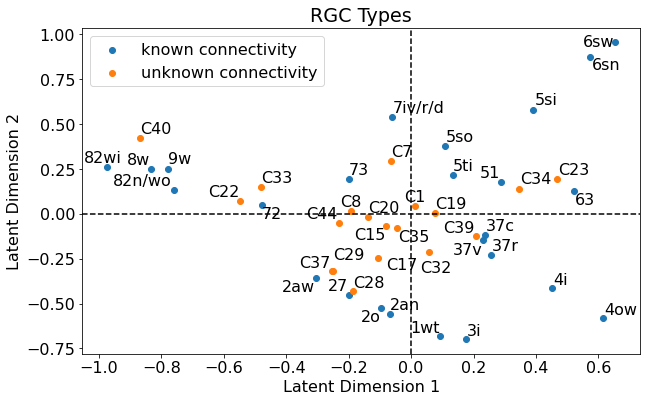

In [89]:
# Get the x and y coordinates from the dataframe
x = rgc_2d[0]
y = rgc_2d[1]

# Plot the points for RGCs not starting with "C"
plt.figure(figsize=(10, 6))
plt.scatter(x[~x.index.str.startswith("C")], y[~y.index.str.startswith("C")], label="known connectivity")

# Plot the points for RGCs starting with "C"
plt.scatter(x[x.index.str.startswith("C")], y[y.index.str.startswith("C")], label="unknown connectivity")

# Set labels for RGC types
rgc_types = rgc_2d.index.tolist()
labels = []
for i, rgc_type in enumerate(rgc_types):
    label = plt.annotate(rgc_type, (x[i], y[i]), textcoords="offset points", ha='center')
    labels.append(label)

# Adjust the positions of the text labels to avoid overlaps
adjust_text(labels)

# Add dashed lines for value of 0 in Dimension 0 and Dimension 1
plt.axhline(0, color='black', linestyle='dashed')
plt.axvline(0, color='black', linestyle='dashed')

# Set title and axis labels
plt.title('RGC Types')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')

# Show the legend
plt.legend()

# Save the figure
plt.savefig('figure5_rgc_plot.svg', format='svg', bbox_inches='tight')

# Show the plot
plt.show()

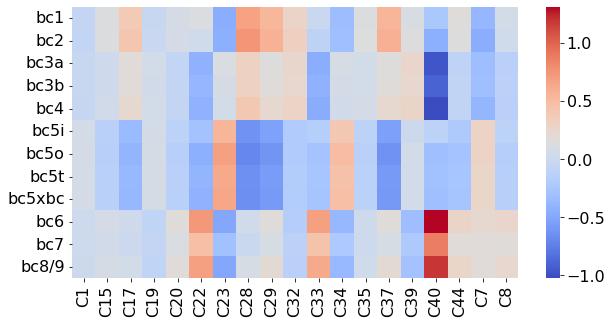

In [90]:
# Filter rgc_2d to select only entries with index starting with "C"
selected_rgc_2d = rgc_2d[rgc_2d.index.str.startswith("C")]

# Compute the dot product of bc_2d and selected_rgc_2d.T
test = bc_2d.dot(selected_rgc_2d.T)
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
heatmap = sns.heatmap(test, cmap='coolwarm')
axs.set_xlabel('')
axs.set_ylabel('')

# Save the figure
plt.savefig('figure5_pred_connectivity.svg', format='svg', bbox_inches='tight')

In [87]:
# Number of top indices to find
top_n = 3

# Initialize an empty dictionary to store the results
top_indices_dict = {}

# Loop through each column of the DataFrame
for col in test.columns:
    # Find the indices with the largest values in the column
    top_indices = test[col].nlargest(top_n).index.tolist()
    # Store the top indices in the dictionary with the column name as the key
    top_indices_dict[col] = top_indices

# Print the results
for col, indices in top_indices_dict.items():
    print(f"Column '{col}': Top {top_n} indices with maximal entries are {', '.join(indices)}")

Column 'C1': Top 3 indices with maximal entries are bc5o, bc5xbc, bc5t
Column 'C15': Top 3 indices with maximal entries are bc2, bc1, bc8/9
Column 'C17': Top 3 indices with maximal entries are bc2, bc1, bc4
Column 'C19': Top 3 indices with maximal entries are bc5o, bc5xbc, bc5t
Column 'C20': Top 3 indices with maximal entries are bc6, bc8/9, bc7
Column 'C22': Top 3 indices with maximal entries are bc6, bc8/9, bc7
Column 'C23': Top 3 indices with maximal entries are bc5o, bc5xbc, bc5t
Column 'C28': Top 3 indices with maximal entries are bc2, bc1, bc4
Column 'C29': Top 3 indices with maximal entries are bc2, bc1, bc4
Column 'C32': Top 3 indices with maximal entries are bc2, bc4, bc1
Column 'C33': Top 3 indices with maximal entries are bc6, bc8/9, bc7
Column 'C34': Top 3 indices with maximal entries are bc5o, bc5xbc, bc5t
Column 'C35': Top 3 indices with maximal entries are bc2, bc1, bc4
Column 'C37': Top 3 indices with maximal entries are bc2, bc1, bc4
Column 'C39': Top 3 indices with ma

In [72]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Assuming you have the rgc_2d and bc_2d DataFrames
# Extract the values (coordinates) from both DataFrames
rgc_coordinates = rgc_2d.values
bc_coordinates = bc_2d.values

# Define the number of nearest neighbors you want to find (k value)
k = 3

# Create a custom distance function based on the dot product
def custom_distance(x, y):
    return 1 - np.dot(x, y)

# Create the NearestNeighbors model with the custom distance function
nn_model = NearestNeighbors(n_neighbors=k, metric=custom_distance)

# Fit the model with the bc_coordinates (the reference points)
nn_model.fit(bc_coordinates)

# Find the k nearest neighbors for each rgc coordinate
distances, indices = nn_model.kneighbors(rgc_coordinates)

# Print the results for each rgc
for i, rgc_index in enumerate(rgc_2d.index):
    rgc_name = rgc_index
    nearest_bc_indices = indices[i]
    nearest_bc_distances = distances[i]
    print(f"For RGC '{rgc_name}', the {k} nearest neighbors in terms of bc are:")
    for j in range(k):
        bc_index = bc_2d.index[nearest_bc_indices[j]]
        distance = nearest_bc_distances[j]
        print(f"  {j+1}. BC '{bc_index}' (Distance: {distance:.4f})")


For RGC '1wt', the 3 nearest neighbors in terms of bc are:
  1. BC 'bc2' (Distance: -0.0775)
  2. BC 'bc1' (Distance: 0.0885)
  3. BC 'bc4' (Distance: 0.1274)
For RGC '27', the 3 nearest neighbors in terms of bc are:
  1. BC 'bc2' (Distance: 0.2177)
  2. BC 'bc1' (Distance: 0.2934)
  3. BC 'bc4' (Distance: 0.5800)
For RGC '2an', the 3 nearest neighbors in terms of bc are:
  1. BC 'bc2' (Distance: 0.0824)
  2. BC 'bc1' (Distance: 0.1987)
  3. BC 'bc4' (Distance: 0.3762)
For RGC '2aw', the 3 nearest neighbors in terms of bc are:
  1. BC 'bc2' (Distance: 0.3403)
  2. BC 'bc1' (Distance: 0.3808)
  3. BC 'bc8/9' (Distance: 0.7486)
For RGC '2o', the 3 nearest neighbors in terms of bc are:
  1. BC 'bc2' (Distance: 0.1261)
  2. BC 'bc1' (Distance: 0.2317)
  3. BC 'bc4' (Distance: 0.4303)
For RGC '37c', the 3 nearest neighbors in terms of bc are:
  1. BC 'bc4' (Distance: 0.7162)
  2. BC 'bc3a' (Distance: 0.7297)
  3. BC 'bc3b' (Distance: 0.7494)
For RGC '37r', the 3 nearest neighbors in terms o